## Importing necessary libraries

In [1]:
import numpy as np    # for numerical data manipulation
import pandas as pd   # for data i/o

import matplotlib.pyplot as plt # plotting
import seaborn as sns  # data visualization
import plotly.graph_objects as go  # interactive data visualization
import plotly.express as px
from plotly.subplots import make_subplots

## Read the data

In [2]:
df = pd.read_csv("/content/WeatherEvents_Jan2016-Dec2022.zip")

In [3]:
df.shape

(8627181, 14)

This data contains all the weather events in US airports from Jan 2016 to Dec 2022.

Weather events

- Fog
- Hail
- Rain
- Snow
- Storm
- Other

The total number of events are 8,627,181 (~8.6 million)

In [4]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


## Null Values

In [6]:
# check how many null values are there in each of the columns

df.isnull().sum()

,0
EventId,0
Type,0
Severity,0
StartTime(UTC),0
EndTime(UTC),0
Precipitation(in),0
TimeZone,0
AirportCode,0
LocationLat,0
LocationLng,0


In [7]:
df.isnull().sum()/8627181

,0
EventId,0.000000
Type,0.000000
Severity,0.000000
StartTime(UTC),0.000000
EndTime(UTC),0.000000
Precipitation(in),0.000000
TimeZone,0.000000
AirportCode,0.000000
LocationLat,0.000000
LocationLng,0.000000


In [8]:
# Since the proportion of null values is so low, we can discard the null values

df.dropna(axis=0, inplace=True)

df.isnull().sum()

,0
EventId,0
Type,0
Severity,0
StartTime(UTC),0
EndTime(UTC),0
Precipitation(in),0
TimeZone,0
AirportCode,0
LocationLat,0
LocationLng,0


## Exploratory data analysis

### Type (Weather event type)

In [9]:
df['Type'].value_counts()

,count
Type,
Rain,4974556
Fog,1992230
Snow,1143419
Cold,230205
Precipitation,156549
Storm,58114
Hail,2909


In [10]:
df['Type'].value_counts(normalize=True)

,proportion
Type,
Rain,0.581277
Fog,0.232792
Snow,0.133608
Cold,0.026899
Precipitation,0.018293
Storm,0.006791
Hail,0.000340


<Axes: xlabel='Type'>

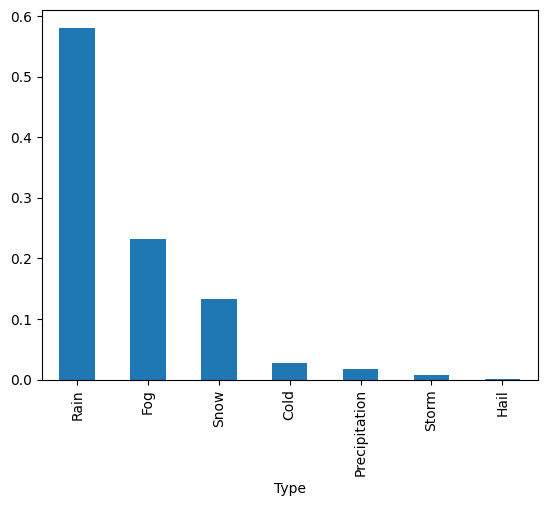

In [12]:
df['Type'].value_counts(normalize=True).plot(kind='bar')

### Severity

In [13]:
df['Severity'].value_counts()

,count
Severity,
Light,5114329
Severe,1707251
Moderate,1359118
Heavy,217826
UNK,156549
Other,2909


In [14]:
df['Severity'].value_counts(normalize=True)

,proportion
Severity,
Light,0.597609
Severe,0.199492
Moderate,0.158813
Heavy,0.025453
UNK,0.018293
Other,0.000340


<Axes: xlabel='Severity'>

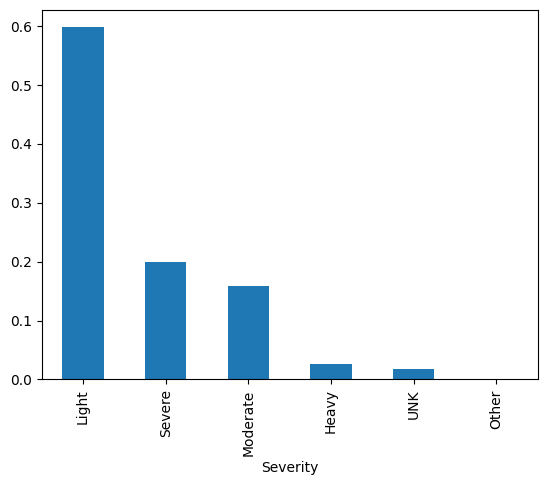

In [15]:
df['Severity'].value_counts(normalize=True).plot(kind='bar')

### Type and Severity joinly

In [16]:
df[['Type','Severity']].value_counts()

,,count
Type,Severity,
Rain,Light,4136499
Fog,Severe,1418932
Snow,Light,977830
Rain,Moderate,658718
Fog,Moderate,573298
Cold,Severe,230205
Rain,Heavy,179339
Precipitation,UNK,156549
Snow,Moderate,127102


### StartTime and EndTime

We will create a column called `duration` using this start and end

In [17]:
date_time_format = "%Y-%m-%d %H:%M:%S"

df['End'] = pd.to_datetime(df['EndTime(UTC)'], format=date_time_format)
df['Start'] = pd.to_datetime(df['StartTime(UTC)'], format=date_time_format)

df['Duration'] = df['End'] - df['Start']
df['Duration'] = df['Duration'].dt.total_seconds()
df['Duration'] = df['Duration']/(3600)   # converting to hours

In [20]:
df['Duration'].max() , df['Duration'].min()

(27208.866666666665, 0.0)

In [21]:
df[df['Duration']==df['Duration'].max()]

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,End,Start,Duration
7829937,W-8251221,Cold,Severe,2016-02-22 14:00:00,2019-04-01 06:52:00,0.0,US/Central,KAWN,32.78,-97.43,Naval Air Station JRB,Tarrant,TX,76127.0,2019-04-01 06:52:00,2016-02-22 14:00:00,27208.866667


In [23]:
df['Duration'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,Duration
0.01,0.066667
0.05,0.150000
0.25,0.333333
0.50,0.666667
0.75,1.266667
0.95,4.333333
0.99,10.133333


In [25]:
df.shape

(8557982, 17)

In [26]:
# Take only those events having durations below 99 percentile.

df = df[df['Duration'] <= df['Duration'].quantile(0.99)]

df.shape

(8472484, 17)

In [27]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode', 'End', 'Start',
       'Duration'],
      dtype='object')

In [29]:
df2 = df.groupby(['AirportCode', 'City', 'State', 'LocationLat', 'LocationLng', 'Type', 'Severity']).agg({'Duration': ['sum', 'mean', 'median']}).reset_index()

df2

AirportCode        City State LocationLat LocationLng           Type  \
                                                                             
0            K01M     Belmont    MS     34.4917    -88.2011           Cold   
1            K01M     Belmont    MS     34.4917    -88.2011            Fog   
2            K01M     Belmont    MS     34.4917    -88.2011            Fog   
3            K01M     Belmont    MS     34.4917    -88.2011  Precipitation   
4            K01M     Belmont    MS     34.4917    -88.2011           Rain   
...           ...         ...   ...         ...         ...            ...   
20553        KZZV  Zanesville    OH     39.9444    -81.8921           Rain   
20554        KZZV  Zanesville    OH     39.9444    -81.8921           Rain   
20555        KZZV  Zanesville    OH     39.9444    -81.8921           Snow   
20556        KZZV  Zanesville    OH     39.9444    -81.8921           Snow   
20557        KZZV  Zanesville    OH     39.9444    -81.8921           Snow   

       Severity     Duration                      
                         sum      mean    median  
0        Severe    34.016667  1.478986  1.000000  
1      Moderate   110.583333  0.837753  1.000000  
2        Severe  1175.550000  0.868847  0.433333  
3           UNK   134.816667  0.588719  0.466667  
4         Heavy   128.050000  0.609762  0.483333  
...         ...          ...       ...       ...  
20553     Light  3122.183333  1.220556  1.000000  
20554  Moderate   431.266667  0.657419  0.500000  
20555     Heavy     8.983333  0.449167  0.383333  
20556     Light   985.333333  1.488419  1.000000  
20557  Moderate    60.300000  0.543243  0.383333  

[20558 rows x 10 columns]

In [33]:
df2.columns.get_level_values(0)

Index(['AirportCode', 'City', 'State', 'LocationLat', 'LocationLng', 'Type',
       'Severity', 'Duration', 'Duration', 'Duration', 'Region'],
      dtype='object')

In [31]:
south = ['AL', 'GA', 'FL', 'SC', 'NC', 'TN', 'MS', 'LA', 'AR', 'OK', 'TX']
atlantic = ['KY', 'VA', 'WV', 'MD', 'DE', 'PA', 'NJ']
new_england = ['NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']
midwest = ['OH', 'IN', 'MI', 'IL', 'WI', 'IA', 'MO', 'MN', 'NE', 'KS', 'SD', 'ND']
west = ['MT', 'WY', 'ID', 'NV', 'UT', 'CO', 'AZ', 'NM']
pacific = ['AK', 'WA', 'OR', 'CA', 'HI']

df2.loc[df2['State'].isin(south), 'Region'] = 'South'
df2.loc[df2['State'].isin(atlantic), 'Region'] = 'Atlantic'
df2.loc[df2['State'].isin(new_england), 'Region'] = 'New England'
df2.loc[df2['State'].isin(midwest), 'Region'] = 'Midwest'
df2.loc[df2['State'].isin(west), 'Region'] = 'West'
df2.loc[df2['State'].isin(pacific), 'Region'] = 'Pacific'

df2

AirportCode        City State LocationLat LocationLng           Type  \
                                                                             
0            K01M     Belmont    MS     34.4917    -88.2011           Cold   
1            K01M     Belmont    MS     34.4917    -88.2011            Fog   
2            K01M     Belmont    MS     34.4917    -88.2011            Fog   
3            K01M     Belmont    MS     34.4917    -88.2011  Precipitation   
4            K01M     Belmont    MS     34.4917    -88.2011           Rain   
...           ...         ...   ...         ...         ...            ...   
20553        KZZV  Zanesville    OH     39.9444    -81.8921           Rain   
20554        KZZV  Zanesville    OH     39.9444    -81.8921           Rain   
20555        KZZV  Zanesville    OH     39.9444    -81.8921           Snow   
20556        KZZV  Zanesville    OH     39.9444    -81.8921           Snow   
20557        KZZV  Zanesville    OH     39.9444    -81.8921           Snow   

       Severity     Duration                       Region  
                         sum      mean    median           
0        Severe    34.016667  1.478986  1.000000    South  
1      Moderate   110.583333  0.837753  1.000000    South  
2        Severe  1175.550000  0.868847  0.433333    South  
3           UNK   134.816667  0.588719  0.466667    South  
4         Heavy   128.050000  0.609762  0.483333    South  
...         ...          ...       ...       ...      ...  
20553     Light  3122.183333  1.220556  1.000000  Midwest  
20554  Moderate   431.266667  0.657419  0.500000  Midwest  
20555     Heavy     8.983333  0.449167  0.383333  Midwest  
20556     Light   985.333333  1.488419  1.000000  Midwest  
20557  Moderate    60.300000  0.543243  0.383333  Midwest  

[20558 rows x 11 columns]

In [34]:
level_0_columns = df2.columns.get_level_values(0)
level_1_columns = df2.columns.get_level_values(1)

level_0_columns, level_1_columns

(Index(['AirportCode', 'City', 'State', 'LocationLat', 'LocationLng', 'Type',
        'Severity', 'Duration', 'Duration', 'Duration', 'Region'],
       dtype='object'),
 Index(['', '', '', '', '', '', '', 'sum', 'mean', 'median', ''], dtype='object'))

In [36]:
columns = [x+'_'+y if len(y)>0 else x for x,y in zip(level_0_columns, level_1_columns)]

columns

['AirportCode',
 'City',
 'State',
 'LocationLat',
 'LocationLng',
 'Type',
 'Severity',
 'Duration_sum',
 'Duration_mean',
 'Duration_median',
 'Region']

In [37]:
df2.columns = columns

df2

,AirportCode,City,State,LocationLat,LocationLng,Type,Severity,Duration_sum,Duration_mean,Duration_median,Region
0,K01M,Belmont,MS,34.4917,-88.2011,Cold,Severe,34.016667,1.478986,1.000000,South
1,K01M,Belmont,MS,34.4917,-88.2011,Fog,Moderate,110.583333,0.837753,1.000000,South
2,K01M,Belmont,MS,34.4917,-88.2011,Fog,Severe,1175.550000,0.868847,0.433333,South
3,K01M,Belmont,MS,34.4917,-88.2011,Precipitation,UNK,134.816667,0.588719,0.466667,South
4,K01M,Belmont,MS,34.4917,-88.2011,Rain,Heavy,128.050000,0.609762,0.483333,South
...,...,...,...,...,...,...,...,...,...,...,...
20553,KZZV,Zanesville,OH,39.9444,-81.8921,Rain,Light,3122.183333,1.220556,1.000000,Midwest
20554,KZZV,Zanesville,OH,39.9444,-81.8921,Rain,Moderate,431.266667,0.657419,0.500000,Midwest
20555,KZZV,Zanesville,OH,39.9444,-81.8921,Snow,Heavy,8.983333,0.449167,0.383333,Midwest
20556,KZZV,Zanesville,OH,39.9444,-81.8921,Snow,Light,985.333333,1.488419,1.000000,Midwest


In [40]:
df2.groupby('Region').agg({'Duration_sum': 'sum'})

,Duration_sum
Region,
Atlantic,9.959924e+05
Midwest,3.096297e+06
New England,8.132324e+05
Pacific,9.720934e+05
South,2.658122e+06
West,8.925806e+05


from matplotlib import pyplot as plt
_df_0['Duration_sum'].plot(kind='hist', bins=20, title='Duration_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Duration_sum'].plot(kind='line', figsize=(8, 4), title='Duration_sum')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Region'>

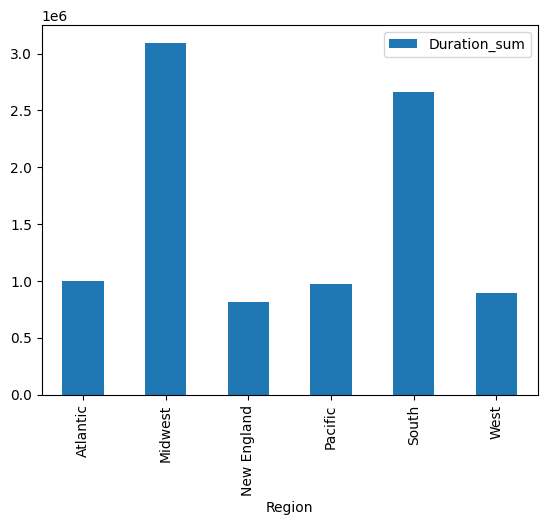

In [41]:
df2.groupby('Region').agg({'Duration_sum': 'sum'}).plot(kind='bar')

In [43]:
df2

,AirportCode,City,State,LocationLat,LocationLng,Type,Severity,Duration_sum,Duration_mean,Duration_median,Region
0,K01M,Belmont,MS,34.4917,-88.2011,Cold,Severe,34.016667,1.478986,1.000000,South
1,K01M,Belmont,MS,34.4917,-88.2011,Fog,Moderate,110.583333,0.837753,1.000000,South
2,K01M,Belmont,MS,34.4917,-88.2011,Fog,Severe,1175.550000,0.868847,0.433333,South
3,K01M,Belmont,MS,34.4917,-88.2011,Precipitation,UNK,134.816667,0.588719,0.466667,South
4,K01M,Belmont,MS,34.4917,-88.2011,Rain,Heavy,128.050000,0.609762,0.483333,South
...,...,...,...,...,...,...,...,...,...,...,...
20553,KZZV,Zanesville,OH,39.9444,-81.8921,Rain,Light,3122.183333,1.220556,1.000000,Midwest
20554,KZZV,Zanesville,OH,39.9444,-81.8921,Rain,Moderate,431.266667,0.657419,0.500000,Midwest
20555,KZZV,Zanesville,OH,39.9444,-81.8921,Snow,Heavy,8.983333,0.449167,0.383333,Midwest
20556,KZZV,Zanesville,OH,39.9444,-81.8921,Snow,Light,985.333333,1.488419,1.000000,Midwest


In [55]:
df2.groupby(['Type','Region']).agg({'Duration_sum': 'sum'}).reset_index().sort_values(by='Duration_sum', ascending=False)

,Type,Region,Duration_sum
28,Rain,South,1.764955e+06
25,Rain,Midwest,1.456524e+06
31,Snow,Midwest,8.369317e+05
10,Fog,South,7.004913e+05
7,Fog,Midwest,6.483343e+05
24,Rain,Atlantic,6.448892e+05
27,Rain,Pacific,5.085705e+05
26,Rain,New England,4.541381e+05
9,Fog,Pacific,3.789498e+05
29,Rain,West,3.433935e+05


In [50]:
df2.groupby(['Type','Region']).agg({'Duration_sum': 'sum'}).reset_index().plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          42 non-null     object 
 1   Region        42 non-null     object 
 2   Duration_sum  42 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


### Nation wide weather event duration

In [56]:
fig_sum = px.histogram(df2, x='Type', y= 'Duration_sum',  histfunc = 'avg', color='Severity',
                      title = 'Fig 1. Nation Wide Weather Events Duration')
fig_sum.update_xaxes(categoryorder='mean descending')
fig_sum.update_yaxes(title_text='Mean of Duration % per Year')
fig_sum.update_layout(height=750, width=1000)
fig_sum.show()

In [58]:
weather = df2.copy()

In [61]:
fig_city = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      hover_name=weather['City'] + ', ' + weather['State'],
                      scope="usa",
                      title ='Cities in this Dataset')
fig_city.show()

In [63]:
pre_flat = df.groupby(['AirportCode','City','State',
                  'LocationLat', 'LocationLng','Type']).agg({'Duration':['sum']}).reset_index()
pre_flat.columns = pd.MultiIndex.from_tuples((("AirportCode", " "),("City", " "),
                                              ("State", " "), ("LocationLat", " "),
                                              ("LocationLng", " "), ("Type", " "),
                                              ("Duration", " ")))
pre_flat.columns = pre_flat.columns.get_level_values(0)
pre_flat['Duration'] = pre_flat['Duration'] / (24*6*3.65) # Yearly Percentage
pre_flat = pre_flat.sort_values(by='Duration')

df_flat = pre_flat.pivot_table(index='AirportCode', columns='Type', values=['Duration']).reset_index().fillna(0)
df_flat.columns = pd.MultiIndex.from_tuples(((' ', 'AirportCode'),(' ', 'Cold'),(' ', 'Fog'),
            (' ',  'Hail'),(' ', 'Precipitation'),(' ', 'Rain'),(' ', 'Snow'),(' ', 'Storm')))
df_flat.columns = df_flat.columns.get_level_values(1)
uniqueKey = df2[['AirportCode', 'City',
                 'State', 'Region', 'LocationLat', 'LocationLng']].sort_values(by='AirportCode').drop_duplicates()
weather = pd.merge(df_flat, uniqueKey, how='inner', on='AirportCode')


#### Rain

In [64]:
fig_rain = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Rain",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense',
                      scope="usa",
                      title ='City Wide Rainy Days Percentage Each Year from 2016 to 2022')
fig_rain.show()

#### Snow

In [67]:
fig_snow = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Snow",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense',
                      scope="usa",
                      title ='City Wide Snow Days Percentage Each Year from 2016 to 2022')
fig_snow.show()

#### Cold

In [69]:
fig_cold = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Cold",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense',
                      scope="usa",
                      title ='Fig 8. City Wide Cold Days Percentage Each Year from 2016 to 2022')
fig_cold.show()

#### Hail

In [70]:
fig_hail = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Hail",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense',
                      scope="usa",
                      title ='City Wide Hail Days Percentage Each Year from 2016 to 20212')
fig_hail.show()